<a href="https://colab.research.google.com/github/gpostill/Applied-ML-for-Healthcare-Course-Project/blob/main/Project_XGBoost_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



###Ensemble and Gradient Boosting Learning: XGBoost Code




Below we create a dummy dataset

In [ ]:
import pandas as pd
import numpy as np

#Creating a DataFrame with random data
np.random.seed(0)   #Set a random seed for reproducibility

#Note that there may be inconsistencies in that some people will have diagnosis dates after their death date

data = {'ID': range(1,301), #300 rows
      'Age_death': np.random.randint(1,110,300),
      'sex': np.random.randint(0,2,300), #0(Male), 1(Female)

      #Adding the dconditions -- Random yes (1) / no (0) to indicate presence or absence of disease
      'Asthma': np.random.randint(0,2,300),
      'CHF': np.random.randint(0,2,300),
      'COPD': np.random.randint(0,2,300),
      'Myocardial_infarction': np.random.randint(0,2,300),
      'Hypertension': np.random.randint(0,2,300),
      'Arrhythmia': np.random.randint(0,2,300),
      'CCS': np.random.randint(0,2,300),
      'Stroke': np.random.randint(0,2,300),
      'Cancer': np.random.randint(0,2,300),
      'Dementia': np.random.randint(0,2,300),
      'Renal_disease': np.random.randint(0,2,300), #I know this is spelt wrong but the analyst misspelled and I haven't changed
      'Diabetes': np.random.randint(0,2,300),
      'Osteoporosis': np.random.randint(0,2,300),
      'Rheumatoid_Arthritis': np.random.randint(0,2,300),
      'Osteo_Arthritis': np.random.randint(0,2,300),
      'Mood_disorder': np.random.randint(0,2,300),
      'Other_Mental_disorder': np.random.randint(0,2,300),

      #Adding the random age of death
      'Age_Asthma': np.random.randint(18,95,300),
      'Age_CHF': np.random.randint(18,95,300),
      'Age_COPD': np.random.randint(18,95,300),
      'Age_Myocardial_infarction': np.random.randint(18,95,300),
      'Age_Hypertension': np.random.randint(18,95,300),
      'Age_Arrhythmia': np.random.randint(18,95,300),
      'Age_CCS': np.random.randint(18,95,300),
      'Age_Stroke': np.random.randint(18,95,300),
      'Age_Cancer': np.random.randint(18,95,300),
      'Age_Dementia': np.random.randint(18,95,300),
      'Age_Renal_disease': np.random.randint(18,95,300), #I know this is spelt wrong but the analyst misspelled and I haven't changed
      'Age_Diabetes': np.random.randint(18,95,300),
      'Age_Osteoporosis': np.random.randint(18,95,300),
      'Age_Rheumatoid_Arthritis': np.random.randint(18,95,300),
      'Age_Osteo_Arthritis': np.random.randint(18,95,300),
      'Age_Mood_disorder': np.random.randint(18,95,300),
      'Age_Other_Mental_disorder': np.random.randint(18,95,300)

      }

#Formatting data into a dataframe structure
df = pd.DataFrame(data)
print(df)

#Removing age of death if no dx:
conditions = ['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrhythmia','CCS','Stroke','Cancer','Dementia',
              'Renal_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Osteo_Arthritis','Mood_disorder','Other_Mental_disorder']

age_conditions = ['Age_Asthma','Age_CHF','Age_COPD','Age_Myocardial_infarction','Age_Hypertension','Age_Arrhythmia','Age_CCS','Age_Stroke','Age_Cancer','Age_Dementia',
                  'Age_Renal_disease','Age_Diabetes','Age_Osteoporosis','Age_Rheumatoid_Arthritis','Age_Osteo_Arthritis','Age_Mood_disorder','Age_Other_Mental_disorder']

for cond,age in zip(conditions,age_conditions):
    df.loc[df[cond] == 0, age] = np.nan


#Creating a Premature Variable
df['Premature'] = ''
df.loc[df['Age_death'] < 75, 'Premature'] = 1
df.loc[df['Age_death'] >= 75, 'Premature'] = 0


#NOTE: I did not add missingness to other sociodemographic variables

#exporting the data as a csv
df.to_csv('DummyData.csv', index = False)

      ID  Age_death  sex  Asthma  CHF  COPD  Myocardial_infarction  \
0      1         45    0       1    1     0                      0   
1      2         48    1       1    0     1                      1   
2      3         65    0       1    0     1                      1   
3      4         68    1       1    0     1                      0   
4      5         68    0       1    1     1                      0   
..   ...        ...  ...     ...  ...   ...                    ...   
295  296          6    0       1    1     1                      0   
296  297        105    0       0    0     0                      1   
297  298         37    1       1    1     1                      0   
298  299          1    1       0    1     0                      0   
299  300         76    1       1    0     0                      0   

     Hypertension  Arrhythmia  CCS  ...  Age_Stroke  Age_Cancer  Age_Dementia  \
0               0           0    1  ...          33          74            38 

Exploratory data analysis

In [ ]:
# Import libraries
import pandas as pd
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Check for missing values in the dataset
df = pd.read_csv('DummyData.csv')
print(df.isna().sum())

ID                             0
Age_death                      0
sex                            0
Asthma                         0
CHF                            0
COPD                           0
Myocardial_infarction          0
Hypertension                   0
Arrhythmia                     0
CCS                            0
Stroke                         0
Cancer                         0
Dementia                       0
Renal_disease                  0
Diabetes                       0
Osteoporosis                   0
Rheumatoid_Arthritis           0
Osteo_Arthritis                0
Mood_disorder                  0
Other_Mental_disorder          0
Age_Asthma                   146
Age_CHF                      166
Age_COPD                     131
Age_Myocardial_infarction    154
Age_Hypertension             148
Age_Arrhythmia               141
Age_CCS                      142
Age_Stroke                   142
Age_Cancer                   148
Age_Dementia                 155
Age_Renal_

In [ ]:
# Summary Statistics
print(df.describe())
df

               ID   Age_death         sex      Asthma         CHF        COPD  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean   150.500000   52.873333    0.500000    0.513333    0.446667    0.563333   
std     86.746758   31.090072    0.500835    0.500657    0.497978    0.496801   
min      1.000000    1.000000    0.000000    0.000000    0.000000    0.000000   
25%     75.750000   28.000000    0.000000    0.000000    0.000000    0.000000   
50%    150.500000   51.000000    0.500000    1.000000    0.000000    1.000000   
75%    225.250000   80.000000    1.000000    1.000000    1.000000    1.000000   
max    300.000000  109.000000    1.000000    1.000000    1.000000    1.000000   

       Myocardial_infarction  Hypertension  Arrhythmia         CCS  ...  \
count             300.000000    300.000000  300.000000  300.000000  ...   
mean                0.486667      0.506667    0.530000    0.526667  ...   
std                 0.500657      0.500791   

,ID,Age_death,sex,Asthma,CHF,COPD,Myocardial_infarction,Hypertension,Arrhythmia,CCS,...,Age_Cancer,Age_Dementia,Age_Renal_disease,Age_Diabetes,Age_Osteoporosis,Age_Rheumatoid_Arthritis,Age_Osteo_Arthritis,Age_Mood_disorder,Age_Other_Mental_disorder,Premature
0,1,45,0,1,1,0,0,0,0,1,...,74.0,38.0,33.0,41.0,47.0,NaN,93.0,NaN,NaN,1
1,2,48,1,1,0,1,1,0,1,1,...,NaN,NaN,NaN,35.0,66.0,NaN,70.0,50.0,NaN,1
2,3,65,0,1,0,1,1,0,0,0,...,NaN,NaN,53.0,78.0,74.0,NaN,NaN,66.0,NaN,1
3,4,68,1,1,0,1,0,0,0,0,...,NaN,NaN,29.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5,68,0,1,1,1,0,0,1,0,...,NaN,NaN,43.0,NaN,NaN,NaN,37.0,NaN,73.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,296,6,0,1,1,1,0,1,1,1,...,NaN,30.0,35.0,40.0,50.0,66.0,23.0,NaN,NaN,1
296,297,105,0,0,0,0,1,0,1,0,...,NaN,NaN,NaN,NaN,71.0,NaN,25.0,30.0,51.0,0
297,298,37,1,1,1,1,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,40.0,NaN,NaN,1
298,299,1,1,0,1,0,0,0,0,1,...,46.0,46.0,NaN,NaN,47.0,NaN,35.0,NaN,NaN,1


In [ ]:
# Check the distribution of age
# Create an interactive histogram for 'age'
fig = px.histogram(df, x='Age_death', nbins=50, title='Distribution of Age at death', color_discrete_sequence=['#b59a36'])
fig.show('colab')

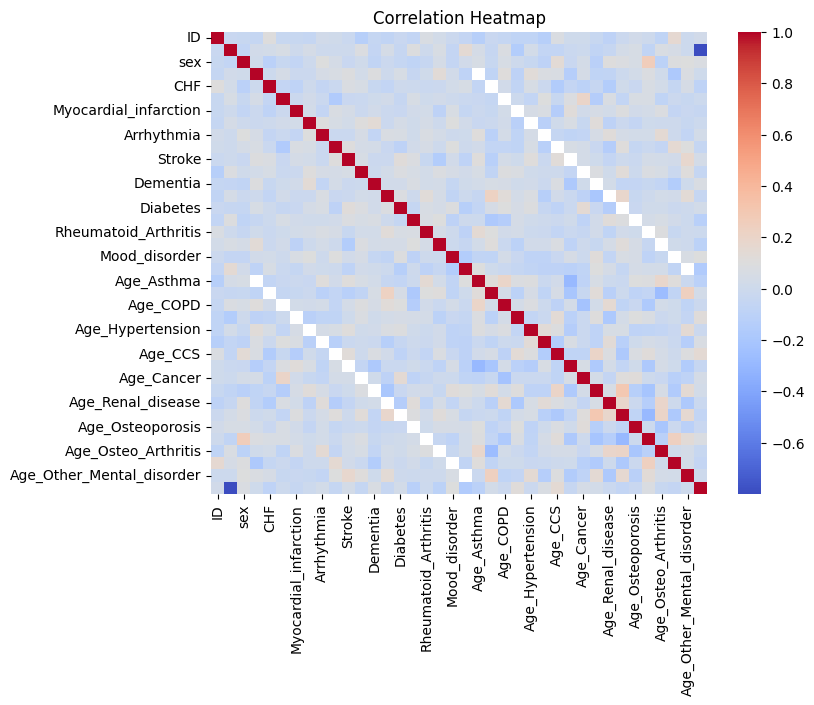

In [ ]:
#Check for collinearity

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# Check for collinearity using only the chronic conditions and sex
# Drop the age at death variables
df_new=df
df_new.drop('Age_Asthma', axis=1, inplace=True)
df_new.drop('Age_CHF', axis=1, inplace=True)
df_new.drop('Age_COPD', axis=1, inplace=True)
df_new.drop('Age_Myocardial_infarction', axis=1, inplace=True)
df_new.drop('Age_Hypertension', axis=1, inplace=True)
df_new.drop('Age_Arrhythmia', axis=1, inplace=True)
df_new.drop('Age_CCS', axis=1, inplace=True)
df_new.drop('Age_Stroke', axis=1, inplace=True)
df_new.drop('Age_Cancer', axis=1, inplace=True)
df_new.drop('Age_Dementia', axis=1, inplace=True)
df_new.drop('Age_Renal_disease', axis=1, inplace=True)
df_new.drop('Age_Diabetes', axis=1, inplace=True)
df_new.drop('Age_Osteoporosis', axis=1, inplace=True)
df_new.drop('Age_Rheumatoid_Arthritis', axis=1, inplace=True)
df_new.drop('Age_Osteo_Arthritis', axis=1, inplace=True)
df_new.drop('Age_Mood_disorder', axis=1, inplace=True)
df_new.drop('Age_Other_Mental_disorder', axis=1, inplace=True)
df_new.head()


,ID,Age_death,sex,Asthma,CHF,COPD,Myocardial_infarction,Hypertension,Arrhythmia,CCS,...,Cancer,Dementia,Renal_disease,Diabetes,Osteoporosis,Rheumatoid_Arthritis,Osteo_Arthritis,Mood_disorder,Other_Mental_disorder,Premature
0,1,45,0,1,1,0,0,0,0,1,...,1,1,1,1,1,0,1,0,0,1
1,2,48,1,1,0,1,1,0,1,1,...,0,0,0,1,1,0,1,1,0,1
2,3,65,0,1,0,1,1,0,0,0,...,0,0,1,1,1,0,0,1,0,1
3,4,68,1,1,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,5,68,0,1,1,1,0,0,1,0,...,0,0,1,0,0,0,1,0,1,1


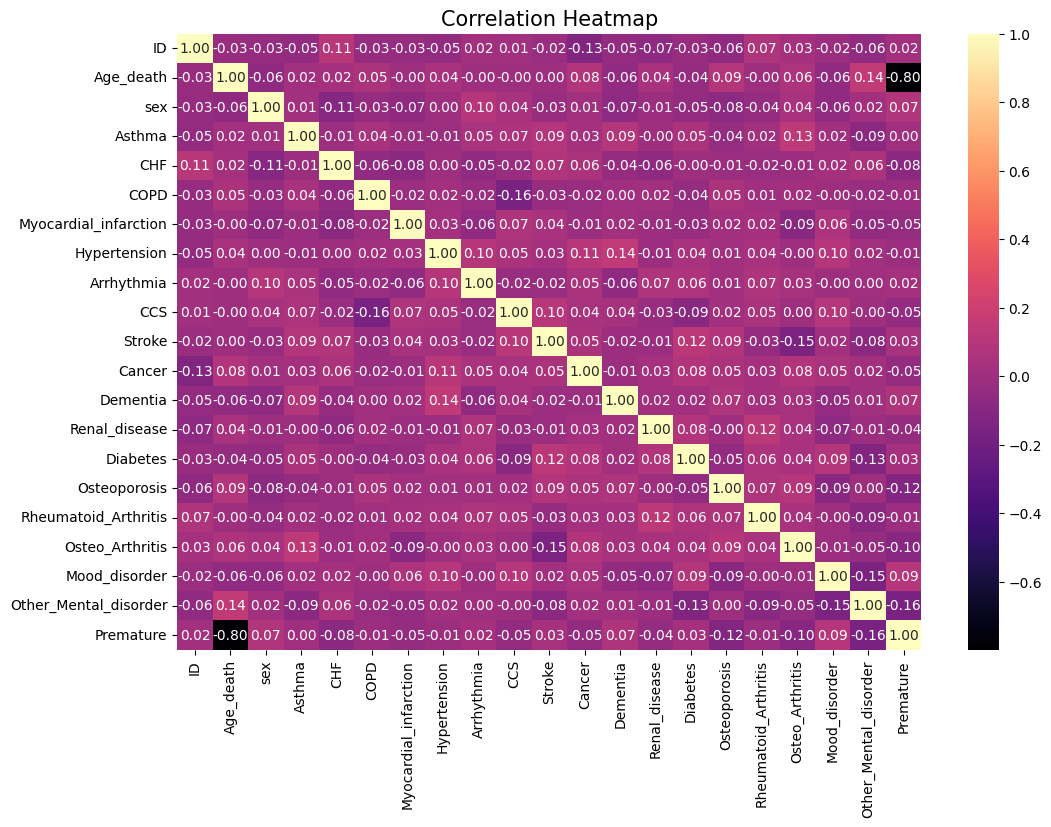

In [ ]:
# Check for collinearity using only the chronic conditions and sex

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='magma')
plt.title('Correlation Heatmap', fontsize=15)
plt.show()

<Axes: >

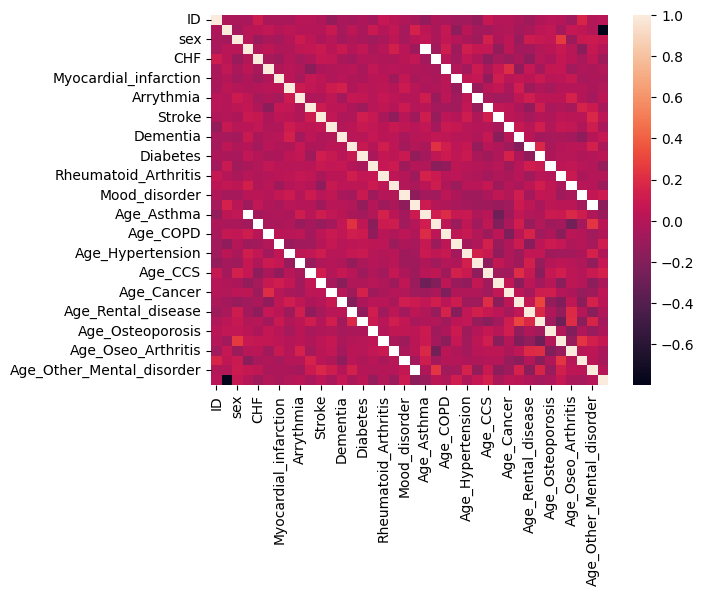

In [ ]:
sns.heatmap(df.corr())

Check for class imbalance

In [ ]:
counts = df['Premature'].value_counts()

# Define the color sequence
colors = ['#1c3a73', '#7cb1c2']

fig = px.pie(
    names=counts.index,
    values=counts.values,
    hole=0.5,  # size of the hole, 0.5 means 50%
    title='"Distribution of Premature mortality"',
    color_discrete_sequence=colors  # apply the colors
)

# Update layout for better appearance
fig.update_layout(
    margin=dict(t=50, b=0, l=0, r=0),  # Adjust top margin to make room for title
    legend=dict(
        orientation="v",
        yanchor="top",
        y=0.5,
        xanchor="left",
        x=1.05,
        title='Class/ASD'
    ),
    title=dict(
        text='Distribution of Classes in "Premature mortality"',
        x=0.45,  # Centering the title
        xanchor='center',
        y=0.95,  # Adjusting y position to place title above chart
        yanchor='top',
        font=dict(size=16)
    ),
    width=500,
    height=350
)

fig.show()

Running the Kmeans Approach Below

Logistic Regression Analysis

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')


# Split the data into features and target variable
X = df[['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrhythmia','CCS','Stroke','Cancer','Dementia',
              'Renal_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Osteo_Arthritis','Mood_disorder','Other_Mental_disorder']]
y = df['Premature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Build the logistic regression model

Confusion Matrix:
[[ 2 14]
 [ 5 39]]

Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.12      0.17        16
           1       0.74      0.89      0.80        44

    accuracy                           0.68        60
   macro avg       0.51      0.51      0.49        60
weighted avg       0.62      0.68      0.64        60



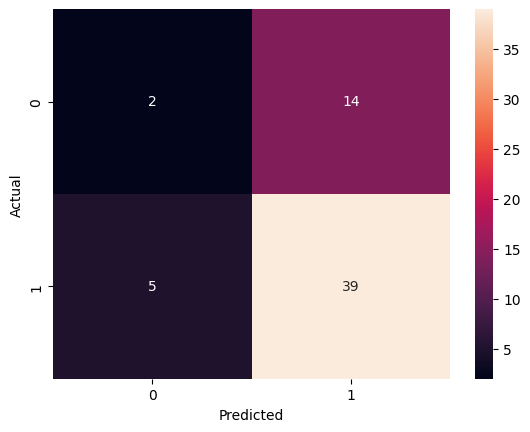

Optimization terminated successfully.
         Current function value: 0.563406
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:              Premature   No. Observations:                  300
Model:                          Logit   Df Residuals:                      282
Method:                           MLE   Df Model:                           17
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                 0.06892
Time:                        04:31:44   Log-Likelihood:                -169.02
converged:                       True   LL-Null:                       -181.53
Covariance Type:            nonrobust   LLR p-value:                   0.09422
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     2.1387      0.577      3.710      0.000       1.009       3.

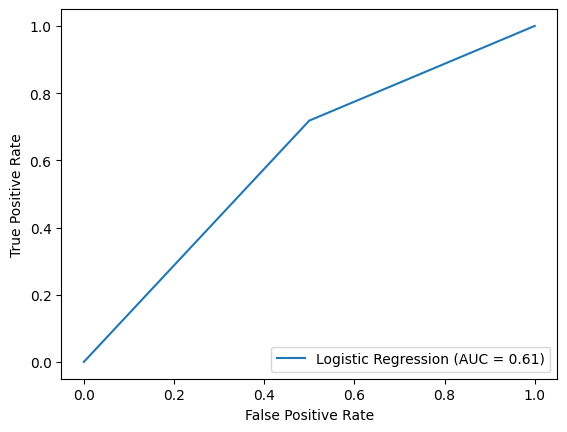

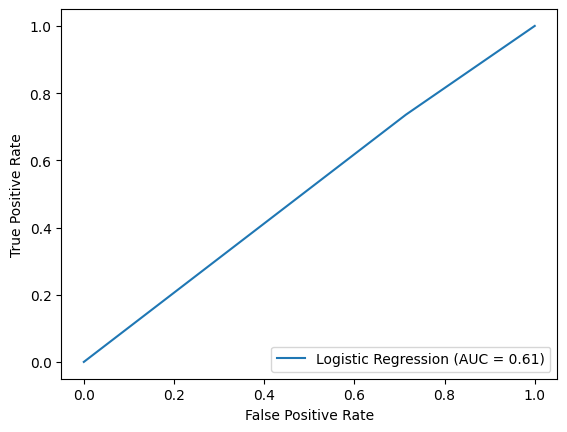

In [ ]:
# Training logistic regression model
log_reg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')
log_reg.fit(X_train, y_train)

# Use the model to make predictions on the testing data
y_pred = log_reg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

# Visualize the confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


# Make predictions on the test and training sets
y_pred_test = log_reg.predict(X_test)
y_pred_train = log_reg.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
#conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
#conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

# Print scores and evaluation metrics for the training set
#print('======== Training Set ==========')
#print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
#print('======== Test Set ==========')
#print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_test, y_test)
roc_auc_test = auc(fpr, tpr)
display_test = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display_test.plot()

## Model Summary
import statsmodels.api as sm

# Add a constant term for the intercept
X = sm.add_constant(X)

# Create and fit logistic regression model
log_reg = sm.Logit(y, X).fit()

# Get summary report
summary = log_reg.summary()
print(summary)

# Extract p-values and odds ratios
p_values = log_reg.pvalues
odds_ratios = np.exp(log_reg.params)

# Filter variables based on a significance level (e.g., 0.05)
significant_vars = p_values[p_values < 0.05]
significant_odds_ratios = odds_ratios[p_values < 0.05]

# Print significant variables and their odds ratios
print("Significant Variables:")
print(significant_vars)
print("Odds Ratios for Significant Variables:")
print(significant_odds_ratios)
print("Odds Ratios of all Variables:")
print(odds_ratios)

Perform Cross validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score
import warnings
from sklearn.metrics import classification_report, confusion_matrix
# from sklearn.preprocessing import TargetEncoder
from category_encoders import TargetEncoder
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.metrics import RocCurveDisplay, auc, roc_curve

warnings.filterwarnings('ignore')

In [ ]:
# Import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.pipeline import Pipeline
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Define a function to compute various scores for model evaluation
def get_scores(Y_pred, Y):
    # Calculate confusion matrix, classification report, ROC AUC, and accuracy
    conf_matrix = confusion_matrix(Y_pred, Y)
    class_report = classification_report(Y_pred, Y)
    auc = roc_auc_score(Y_pred, Y)
    acc = accuracy_score(Y_pred, Y)

    # Return the computed scores
    return conf_matrix, class_report, auc, acc

# Define a function to print the computed scores
def print_scores(conf_matrix, class_report, auc, acc):
    print('AUC : ', auc)
    print('Accuracy : ', acc)
    print("Confusion Matrix:")
    print(conf_matrix)
    print("\nClassification Report:")
    print(class_report)


# Split the data into features and target variable
X = df[['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrhythmia','CCS','Stroke','Cancer','Dementia',
              'Renal_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Osteo_Arthritis','Mood_disorder','Other_Mental_disorder']]
y = df['Premature']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Cross-valiation setup using K-fold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

total_validation_loss = 0
for train_index, valid_index in kf.split(X_train):
  X_train_data, X_valid_data = X_train.iloc[train_index],
  X_train.iloc[valid_index]
  Y_train_data, Y_valid_data = y_train.iloc[train_index], y_train.iloc[valid_index]

# Define Pipeline model
model = Pipeline('nomralizer', StandardScaler()), classifier': LogisticRegression())

# Fit the model
model = LogisticRegression()
model.fit(X_train_data)

# Assess the model
  y_valid_pred = model.predict(Y_test_train_data)
  validation_acc = accuracy_score(Y_valid_data, y_valid_pred)
  total_validation_loss += validation_acc

  total_validation_loss /=k




SyntaxError: ignored

======== Training Set ==========
AUC :  0.794333170493405
Accuracy :  0.8678571428571429
Confusion Matrix:
[[409  36]
 [ 38  77]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       445
           1       0.68      0.67      0.68       115

    accuracy                           0.87       560
   macro avg       0.80      0.79      0.80       560
weighted avg       0.87      0.87      0.87       560

======== Test Set ==========
AUC :  0.8004658385093166
Accuracy :  0.875
Confusion Matrix:
[[173  11]
 [ 19  37]]

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.94      0.92       184
           1       0.77      0.66      0.71        56

    accuracy                           0.88       240
   macro avg       0.84      0.80      0.82       240
weighted avg       0.87      0.88      0.87       240

[1.85138766 0.85138766 0.82333671 0.81794796 0.7872656

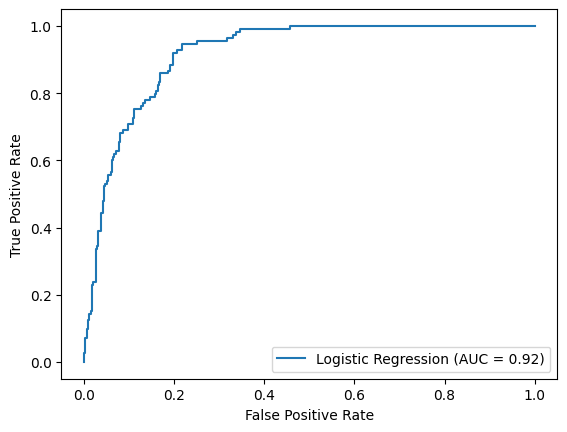

In [ ]:
data['gender'].replace({'Female' : 1, 'Male' : 0}, inplace=True)

# Splitting the dataset into training and test sets
train = data.sample(frac=0.7, random_state=10)  # 70% for training
test = data.drop(train.index)  # Remaining data for testing

# Feature engineering and preprocessing on the training set
X_train, Y_train, country_transofrmer, ethnicity_transformer, relation_transformer, imputer, st_x = fit_transform(train)

# Preprocess and transform the test set
X_test = transform(test, country_transofrmer, ethnicity_transformer, relation_transformer, imputer, st_x)
Y_test = test['Class/ASD'].to_numpy()

# Initialize and train a logistic regression model
model = LogisticRegression()
model.fit(X_train, Y_train)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)
y_probalities = model.predict_proba(X_train)

# Calculate evaluation metrics and scores for the test and training sets
conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, Y_test)
conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, Y_train)

# Print scores and evaluation metrics for the training set
print('======== Training Set ==========')
print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
print('======== Test Set ==========')
print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(Y_train, y_probalities[:, 1])
print(thresholds)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()


In [ ]:
# Import necessary libraries for feature selection and logistic regression
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold

# Make a copy of the dataset
#df_cv=df

# Split the data into features and target variable
X = df[['Asthma','CHF','COPD','Myocardial_infarction','Hypertension','Arrythmia','CCS','Stroke','Cancer','Dementia',
              'Rental_disease','Diabetes','Osteoporosis','Rheumatoid_Arthritis','Oseo_Arthritis','Mood_disorder','Other_Mental_disorder']]
y = df['Premature']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Preprocess the training and test sets
#X_train, y_train = transform(train)
#X_test = transform(test)
y_test = test['Premature'].to_numpy()

# Initialize a Logistic Regression model
model = LogisticRegression()

# Define a StratifiedKFold cross-validation
cv = StratifiedKFold(3)

# Initialize Recursive Feature Elimination with Cross-Validation (RFECV)
rfecv = RFECV(
    estimator=model,
    step=1,
    cv=cv,
    scoring='roc_auc',  # Specify the scoring metric (ROC AUC)
    min_features_to_select=1,
)
rfecv.fit(X_train, y_train)

# Print the optimal number of selected features
print(f"Optimal number of features: {rfecv.n_features_}")


Optimal number of features: 3


In [ ]:
# which columns used and which wasn't
rfecv.support_  #Selected features are Osteoporosis, Osteo_Arthritis and Other_Mental_disorder

array([False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True, False,  True])

Now train the model using only the selected features

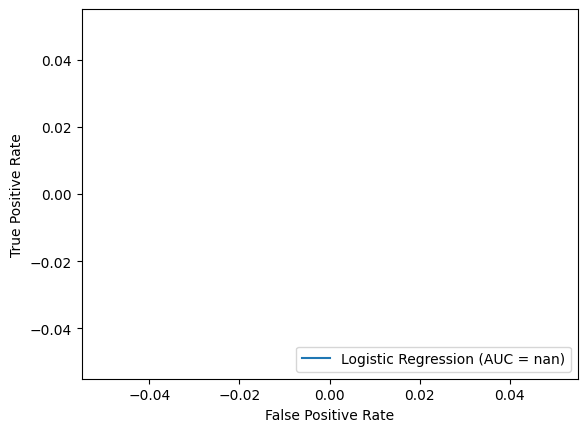

In [ ]:
# Preprocess the training and test sets

Y_test = test['Premature'].to_numpy()

# Select only the features that were chosen by RFECV
#X_train = X_train['Osteoporosis', 'Osteo_Arthritis', 'Other_Mental_disorder'_]
#X_test = X_test['Osteoporosis', 'Osteo_Arthritis', 'Other_Mental_disorder'_]

# Split the data into features and target variable using only RFECV support features
X = df[['Osteoporosis','Oseo_Arthritis','Other_Mental_disorder']]
y = df['Premature']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test and training sets
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

# Calculate evaluation metrics and scores for the test and training sets
#conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
#conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

# Print scores and evaluation metrics for the training set
#print('======== Training Set ==========')
#print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
#print('======== Test Set ==========')
#print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()

In [ ]:
# features ranking low is better
rfecv.ranking_

array([11,  3,  7,  5,  9, 13,  2, 10,  6,  8, 14, 12,  1, 15,  1,  4,  1])

Tree-based Classifiers

In [ ]:
# !pip install category_encoders

import pandas as pd
import numpy as np
import warnings
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
# from sklearn.metrics import RocCurveDisplay, auc, roc_curve
from sklearn.metrics import roc_auc_score, accuracy_score
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


warnings.filterwarnings('ignore')

Decision Trees Classifier

In [ ]:
# Splitting the data into 70% training and 30% testing
train = df.sample(frac=0.7, random_state=30)
test = df.drop(train.index)

# Initializing a column transformer that will handle categorical data encoding
#ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [c for c in categorical_columns if c != 'country']),
                        #('target_encoder', TargetEncoder(), ['country'])],
                       #remainder='passthrough')

# Initializing a Decision Tree classifier
dt = tree.DecisionTreeClassifier(criterion='entropy',class_weight='balanced')

# Creating a pipeline that first preprocesses the data and then applies the decision tree
model = Pipeline([
    #('pre_process', ct),
    ('DT', dt)
])

# Training the model on the training data
model = model.fit(train.drop('Premature', axis=1), train['Premature'])

# Predicting and evaluating the model's performance on the training data
Y_pred = model.predict(train.drop('Premature', axis=1))
accuracy_score(train['Premature'], Y_pred)

1.0

In [ ]:
# Predicting and evaluating the model's performance on the test data
Y_pred = model.predict(test.drop('Premature', axis=1))
accuracy_score(test['Premature'], Y_pred)

0.9888888888888889

XGBoost Classifier using random forest as the base learner

In [ ]:
# Initializing the ColumnTransformer
# One-hot encoding is applied to all categorical columns except 'country'
# Target encoding is applied specifically to the 'country' column
#ct = ColumnTransformer([
    #('one_hot_encoder', OneHotEncoder(), [c for c in categorical_columns if c != 'country']),
    #]remainder='passthrough')  # Any other columns not specified will be passed through without any transformation

# Initializing the Gradient Boosting Classifier with specified parameters
random_forest = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

# Creating a Pipeline:
# First, the data goes through the specified column transformations (ct)
# Then, the transformed data is used to train or predict using the Gradient Boosting model
model = Pipeline([
    #('pre_process', ct),        # Pre-processing step: Applying column transformations
    ('xg_boost', random_forest) # Training/prediction step: Using Gradient Boosting
])

In [ ]:
# Training the Gradient Boosting model on the training dataset
model = model.fit(train.drop('Premature', axis=1), train['Premature'])

# Predicting on the training dataset and computing the accuracy
Y_pred = model.predict(train.drop('Premature', axis=1))
accuracy_score(train['Premature'], Y_pred)

# Predicting on the test dataset and computing the accuracy
Y_pred = model.predict(test.drop('Premature', axis=1))
accuracy_score(test['Premature'], Y_pred)

0.9888888888888889

In [ ]:
# Setting up the column transformations (One-hot encoding for some categorical columns and target encoding for 'country')
#ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), [c for c in categorical_columns if c != 'country']),
                        #('target_encoder', TargetEncoder(), ['country'])],
                       #remainder='passthrough')

# Initializing the Gradient Boosting model with initial parameters
random_forest = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)

# Creating a pipeline that first applies the column transformations and then runs the Gradient Boosting model
model = Pipeline([
    #('pre_process', ct),
    ('xg_boost', random_forest)
])

In [ ]:
# Defining the hyperparameters to be tuned using GridSearchCV
param_dist = {
    "xg_boost__n_estimators" : [100, 200],
    "xg_boost__max_depth" : [1, 5],
    "xg_boost__min_samples_leaf" : [25],
    "xg_boost__learning_rate" : [.1,  .2]
}

# Using StratifiedKFold for cross-validation, ensuring each fold has the same proportion of observations with each target value
skf = StratifiedKFold(n_splits=5)

# Setting up the GridSearchCV to find the best hyperparameters for the Gradient Boosting model
random_search = GridSearchCV(
    model, param_grid=param_dist, cv=skf
)

# Fitting the GridSearchCV on the training data
random_search.fit(train.drop('Premature', axis=1), train['Premature'])

# Storing and displaying the results of the grid search
results = pd.DataFrame(random_search.cv_results_)
results[results['rank_test_score'] == 1]

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xg_boost__learning_rate,param_xg_boost__max_depth,param_xg_boost__min_samples_leaf,param_xg_boost__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.062474,0.003138,0.002690,0.000462,0.1,1,25,100,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
1,0.117291,0.010475,0.002441,0.000084,0.1,1,25,200,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
2,0.059705,0.001278,0.002410,0.000120,0.1,5,25,100,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
3,0.115719,0.007415,0.002435,0.000078,0.1,5,25,200,"{'xg_boost__learning_rate': 0.1, 'xg_boost__ma...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
4,0.056938,0.001566,0.002391,0.000159,0.2,1,25,100,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
5,0.104638,0.004883,0.002770,0.000468,0.2,1,25,200,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
6,0.055159,0.000975,0.002339,0.000118,0.2,5,25,100,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1
7,0.101166,0.001275,0.002701,0.000431,0.2,5,25,200,"{'xg_boost__learning_rate': 0.2, 'xg_boost__ma...",1.0,1.0,1.0,1.0,1.0,1.0,0.0,1


In [ ]:
# Updating the model's parameters with the best ones found from GridSearchCV
model = model.set_params(**random_search.best_params_)

# Retraining the model with the best parameters on the training dataset
model = model.fit(train.drop('Premature', axis=1), train['Premature'])

# Predicting on the training dataset and computing the accuracy
Y_pred = model.predict(train.drop('Premature', axis=1))
accuracy_score(train['Premature'], Y_pred)

# Predicting on the test dataset and computing the accuracy
Y_pred = model.predict(test.drop('Premature', axis=1))
accuracy_score(test['Premature'], Y_pred)

0.9888888888888889

###Evaluating the Model

In [ ]:
# Calculate evaluation metrics and scores for the test and training sets
#conf_matrix_test, class_report_test, auc_test, acc_test = get_scores(y_pred_test, y_test)
#conf_matrix_train, class_report_train, auc_train, acc_train = get_scores(y_pred_train, y_train)

# Print scores and evaluation metrics for the training set
#print('======== Training Set ==========')
#print_scores(conf_matrix_train, class_report_train, auc_train, acc_train)

# Print scores and evaluation metrics for the test set
#print('======== Test Set ==========')
#print_scores(conf_matrix_test, class_report_test, auc_test, acc_test)

# Plot the ROC curve for the training set
fpr, tpr, thresholds = roc_curve(y_pred_train, y_train)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='Logistic Regression')
display.plot()